In [1]:
import pandas as pd
import numpy as np
import string
from typing import Literal
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)


In [29]:
trains = pd.read_csv(r"C:\Users\AmirHussain\Desktop\پروژه ی دانشگاه\Multi-layer-perceptron\mlp-dataSets\train\alphabet_dataset.txt", header= None)

tests_10 = pd.read_csv(r"C:\Users\AmirHussain\Desktop\پروژه ی دانشگاه\Multi-layer-perceptron\mlp-dataSets\test\letter10error.txt", header= None)
tests_15 = pd.read_csv(r"C:\Users\AmirHussain\Desktop\پروژه ی دانشگاه\Multi-layer-perceptron\mlp-dataSets\test\letter15error.txt", header= None)
tests_20 = pd.read_csv(r"C:\Users\AmirHussain\Desktop\پروژه ی دانشگاه\Multi-layer-perceptron\mlp-dataSets\test\letter20error.txt", header= None)
trains.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-1,-1,1,1,-1,-1,-1,-1,-1,-1,...,1,-1,1,1,1,-1,1,1,1,A
1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,1,-1,-1,-1,1,-1,A
2,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,1,-1,-1,-1,1,1,A
3,1,1,1,1,1,1,-1,-1,1,-1,...,-1,1,1,1,1,1,1,1,-1,B
4,1,1,1,1,1,1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,1,-1,B


In [3]:
letters = list(string.ascii_uppercase)
outputs = {key: val for key, val in zip(letters, range(len(letters)))}
trains[63] = trains[63].map(outputs)
tests_10[63] = tests_10[63].map(outputs)
tests_15[63] = tests_15[63].map(outputs)
tests_20[63] = tests_20[63].map(outputs)

In [4]:
trains.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-1,-1,1,1,-1,-1,-1,-1,-1,-1,...,1,-1,1,1,1,-1,1,1,1,0
1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,1,-1,-1,-1,1,-1,0
2,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,1,-1,-1,-1,1,1,0
3,1,1,1,1,1,1,-1,-1,1,-1,...,-1,1,1,1,1,1,1,1,-1,1
4,1,1,1,1,1,1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,1,-1,1


In [5]:
X_train = trains.drop(63, axis= 1).to_numpy()
X_10 = tests_10.drop(63, axis= 1).to_numpy()
X_15 = tests_15.drop(63, axis= 1).to_numpy()
X_20 = tests_20.drop(63, axis= 1).to_numpy()
################################
Y_train = trains[63].to_numpy()
# print(Y_train.tolist())
Y_train = np.eye(len(set(Y_train)))[Y_train]


Y_10 = tests_10[63].to_numpy()
Y_10 = Y_10.tolist()

Y_15 = tests_15[63].to_numpy()
Y_15 = Y_15.tolist()

Y_20 = tests_20[63].to_numpy()
Y_20 = Y_20.tolist()
Y_train.shape

(78, 26)

# activation Functions

In [6]:
def sigmoid(x):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


def Bipolar_sigmoid(x ):
    """Bipolar sigmoid function"""
    return (1 - np.exp(-x)) / (1 + np.exp(-x))
    
def Bipolar_sigmoid_derivative(x):
    f_x = Bipolar_sigmoid(x)
    return 0.5 * (1 - f_x**2)


def Softmax_function(x):
    """Softmax activation function"""
    e_x = np.exp(x - np.max(x))
    return e_x/e_x.sum()

def Softmax_derivative(x):
    """Derivative of softmax activation function"""
    return Softmax_function(x)*(1-Softmax_function(x))
    

In [20]:
class NlpClassifier:
    def __init__(self,layers : tuple[int,] | list[int,] , 
                 learning_rate : float, 
                 max_iter : float,
                 activation_function : Literal["sigmoid", "bp_sigmoid", "softmax"]):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        
        self.layers = layers
        match activation_function:
            case "sigmoid":
                self.ac_fuct = sigmoid
                self.ac_derive = sigmoid_derivative
            case "bp_sigmoid":
                self.ac_fuct = Bipolar_sigmoid
                self.ac_derive = Bipolar_sigmoid_derivative
            case "softmax":
                self.ac_fuct = Softmax_function
                self.ac_derive = Softmax_derivative
            case _:
                raise ValueError("Invalid activation_function Function")
        
    def _build_weights_and_bias(self, layers : list[int,]):
        weights = []
        bias = []
        for i in range( len(layers) -1 ):
            weights.append (  np.random.uniform (-1, 1  ,(layers[i + 1],  layers[ i ] ))     )
            bias.append ( np.random.uniform  (-1, 1 , ( 1, layers[i+1])        )  )
        return weights, bias



    def _feed_forward(self, input_data):
        if not isinstance(input_data, np.ndarray):
            input_data = np.array(input_data).reshape(1,-1)
        else:
            input_data = input_data.reshape(1,-1)
            

        current = input_data 

        self.all_layers_output = [current]

        for LAYER in range(len(self.weights) ):

            nouron_feed =  np.dot(current,  self.weights[LAYER].T) + self.bias[LAYER] 

            fx = self.ac_fuct(nouron_feed)
            self.all_layers_output.append(fx)
            current = fx


        return  current[0]

    def _back_propagation(self, target):
        """ Unpack the intermediate results from feed_forward"""

        y_hat = self.all_layers_output[-1]

        out_put_layer_sigma = (y_hat - target) * self.ac_derive(y_hat)

        loss = .5 * ((y_hat - target)**2)[0]

        sigmas = [out_put_layer_sigma[0].reshape(-1,1)]

        for seq in reversed(range(len(self.weights) - 1)):

            sigma_k = np .dot( self.weights[seq+1].T,  sigmas[-1]) * self.ac_derive(self.all_layers_output[seq+1]).T

            sigmas.append(sigma_k)

        sigmas.reverse()

        for e in range(len(self.weights)):

            E = np.dot(self.all_layers_output[e].T, sigmas[e].T)

            self.weights[e] -= self.learning_rate * E.T
            self.bias[e] -= self.learning_rate * sigmas[e].T

        return loss, self.weights, self.bias
    
    def fit(self,  inputs, targets) -> dict:
        if not isinstance(self.layers, list):
            self.layers = list(self.layers)
            
        self.layers.insert(0, inputs.shape[1] )
        self.layers.append(targets.shape[1])


        self.weights, self.bias = self._build_weights_and_bias(self.layers)

        history = {"curve": None,
                'loss': None}
        
        sum_err = []

        for iter in range(self.max_iter):
            Er = []
            for i in range(len(inputs)):

                _  = self._feed_forward(inputs[i])
                err, new_ws, new_bs  = self._back_propagation( targets[i] )
                self.weights = new_ws
                self.bias = new_bs
                Er.append(np.mean(err))
            sum_err.append(np.mean(Er))




        history["curve"] = sum_err
        history["loss"] = sum_err[-1]
        history['weights'] = self.weights
        history['biases'] = self.bias
        history['layers'] = self.layers
        history['learning rate'] = self.learning_rate

        return history

    
    def predict(self, x  ):
        ts = np.array(x).ndim
        
        if ts == 1:
            ans = self._feed_forward(input_data = x )
            return np.argmax(ans)
        else:
            answers = []

            for i in x:
                a = self._feed_forward(input_data = i)
                answers.append(np.argmax(a ))

            return answers
        
    def evaluete(self, predicted, labels):
        if isinstance(labels, np.ndarray):
            labels = labels.tolist()
            
        if isinstance(predicted, np.ndarray):
            predicted = predicted.tolist()
            
        # predicted = np.argmax(predicted , axis=1)
        total = len(labels) 
        compare = 0
        for i, j in zip(predicted, labels):
            if i == j :
                compare +=1
        return np.mean( compare ) / total


In [36]:
model = NlpClassifier(layers = (100,50,26 ),
                        learning_rate = 0.1,
                        max_iter = 1000,
                        activation_function = "sigmoid")
hist = model.fit( 
           X_train, Y_train,)


In [37]:
predict_train = model.predict(X_train )
evaluate_train = model.evaluete(predict_train , np.argmax(Y_train, axis=1))

predict_test_10 = model.predict(X_10 )
evaluate_test_10 = model.evaluete(predict_test_10 , Y_10)

predict_test_15 = model.predict(X_15 )
evaluate_test_15 = model.evaluete(predict_test_15 , Y_15)

predict_test_20 = model.predict(X_20 )
evaluate_test_20 = model.evaluete(predict_test_20 , Y_20)


evaluations= pd.DataFrame({
    "Train dataset" : evaluate_train,
    "10% error dataset" : [evaluate_test_10,],
    "15% error dataset" : [evaluate_test_15,],
    "20% error dataset" : [evaluate_test_20,]
})

evaluations.T

,0
Train dataset,1.000000
10% error dataset,0.653846
15% error dataset,0.461538
20% error dataset,0.384615


loss:  0.00048


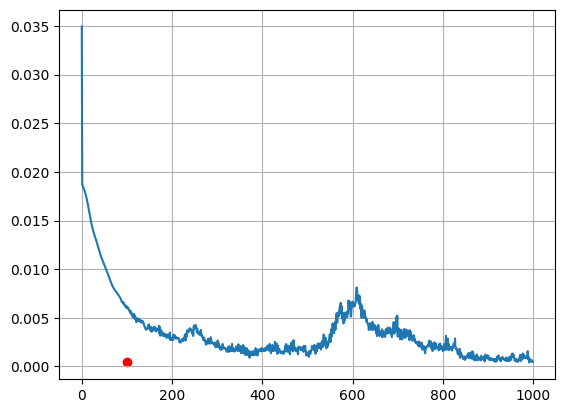

In [38]:
print(f"loss: {hist['loss']: .5f}")
# print(f"final learning rate {hist['learning rate']}")

sns.lineplot(hist['curve'])
plt.scatter( 100,hist['loss'], c = "r"  )
plt.grid()
             
plt.show()

In [35]:
   
active_function = "softmax"
posible_layers = [10 , 15 , 20, 25, 30]
posible_lr = [.1 , .2 , .3 , .4 , .5 , .6 , .7 , .8 , .9]
posible_iter = [100 , 200 , 300 , 400 , 500 , 600 , 700 , 800 , 900 , 1000]


# Posible Layers

In [39]:

error_due_layers = list()

accu_on_train = list()
accu_on_10_layer = list()
accu_on_15_layer = list()
accu_on_20_layer = list()

for idx , layers in enumerate(posible_layers, 1):

    model_layer = NlpClassifier(
                        layers = (layers,),
                        learning_rate = .1 ,
                        max_iter = 100,
                        activation_function = active_function)
    
    histroy = model_layer.fit(X_train ,Y_train)
    error_due_layers.append(histroy['loss'])

    predict_on_train = model_layer.predict(X_train )
    score_00 = model_layer.evaluete(predict_on_train , np.argmax(Y_train, axis=1))
    accu_on_train.append(score_00 )

    predict_on_10 = model_layer.predict(X_10 )
    score_10 = model_layer.evaluete(predict_on_10 , Y_10)
    accu_on_10_layer.append(score_10 )
    
    predict_on_15 = model_layer.predict(X_15 )
    score_20 = model_layer.evaluete(predict_on_15 , Y_15)
    accu_on_15_layer.append(score_20 )
    
    predict_on_20 = model_layer.predict(X_20 )
    score_30 = model_layer.evaluete(predict_on_20 , Y_20)
    accu_on_20_layer.append( score_30 )
    
    print(f"""{pd.DataFrame({
                            "layer": [layers,],
                            "loss" : [histroy['loss'],],
                            "train" : [score_00,],
                            "10%"  : [score_10 ,],
                            "15%"  : [ score_20,],
                            "20%"  : [ score_30 ,] }
                            , index = [idx])

                            } 
""")
print("="*25)

result_1 = pd.DataFrame({
                        "layers": posible_layers,
                        "loss"  : error_due_layers,
                        "train" : accu_on_train ,
                        "10%"  :  accu_on_10_layer,
                        "15%"  :  accu_on_15_layer,
                        "20%"  :  accu_on_20_layer }, dtype=np.float16)


result_1['layers'] = result_1['layers'].astype('int')

result_1.set_index("layers", inplace= True)

# with pd.ExcelWriter("total results-nemo.xlsx", mode= "w") as writer:
#     result_1.to_excel(writer, sheet_name='layers')


result_1




   layer      loss     train       10%       15%       20%
1     10  0.017431  0.269231  0.115385  0.115385  0.038462 

   layer      loss     train       10%       15%       20%
2     15  0.017781  0.217949  0.038462  0.115385  0.076923 

   layer      loss     train       10%       15%       20%
3     20  0.017711  0.192308  0.153846  0.076923  0.115385 

   layer     loss    train       10%       15%       20%
4     25  0.01772  0.25641  0.230769  0.076923  0.153846 

   layer     loss     train       10%       15%       20%
5     30  0.01779  0.217949  0.115385  0.115385  0.153846 



,loss,train,10%,15%,20%
layers,,,,,
10,0.017426,0.269287,0.115356,0.115356,0.038452
15,0.017776,0.217896,0.038452,0.115356,0.076904
20,0.017715,0.192261,0.153809,0.076904,0.115356
25,0.017715,0.256348,0.230713,0.076904,0.153809
30,0.017792,0.217896,0.115356,0.115356,0.153809


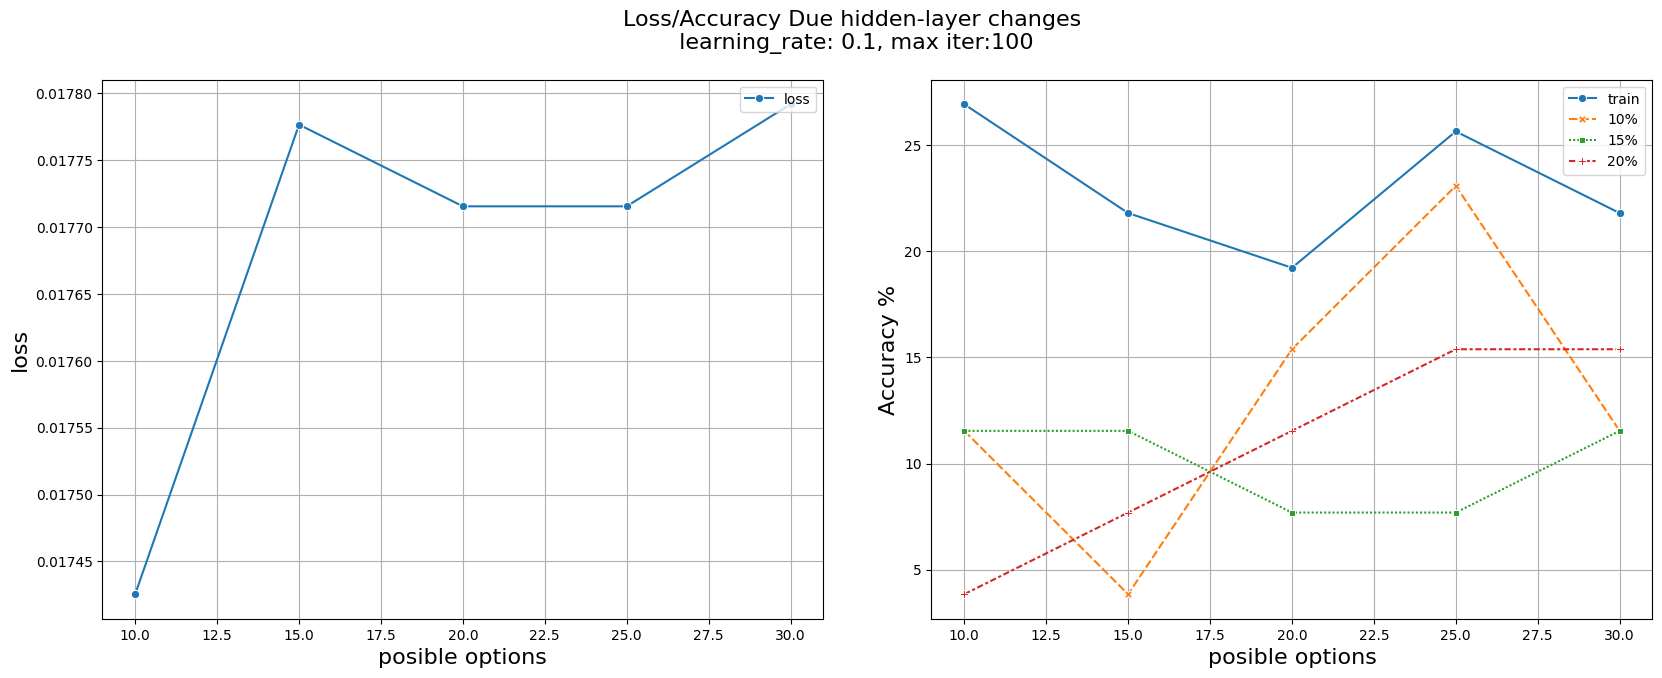

In [40]:


fig, (ax1 , ax2)= plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle(f"Loss/Accuracy Due hidden-layer changes\n learning_rate: {.1}, max iter:{100}", fontsize=16, color = 'k' )
plt.subplots_adjust(left= None, bottom=None, right= None , top=None, wspace=0.15, hspace=0.3)



sns.lineplot(result_1[['loss']]
             , ax=ax1,  markers= True)



sns.lineplot(result_1[[ "train" ,"10%" ,  "15%" , "20%" ]] * 100
             , ax=ax2,  markers= True)



ax1.set_xlabel('posible options' , fontsize=16)
ax2.set_xlabel('posible options' , fontsize=16)

ax1.set_ylabel('loss' , fontsize=16)
ax2.set_ylabel('Accuracy %' , fontsize=16)


ax1.grid()
ax2.grid()

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

fig.savefig(r"./Error-Accuracy Due hidden layer changes.svg", dpi = 'figure')

plt.show()


# Posible Learning Rates


In [41]:

error_due_lr = list()

accu_on_train = list()
accu_on_10_lr = list()
accu_on_15_lr = list()
accu_on_20_lr = list()

for idx, lr in enumerate(posible_lr, 1):
    model_lr = NlpClassifier(
                        layers= (100,),
                        learning_rate = lr,
                        max_iter = 100,
                        activation_function = active_function)
    
    histroy = model_lr.fit(X_train ,Y_train)
    error_due_lr.append(histroy['loss'])

    predict_on_train = model_lr.predict(X_train )
    score_01 = model_lr.evaluete(predict_on_train , np.argmax(Y_train, axis=1))
    accu_on_train.append(score_01 )

    predict_on_10 = model_lr.predict(X_10 )
    score_11 = model_lr.evaluete(predict_on_10 , Y_10)
    accu_on_10_lr.append(score_11 )
    
    predict_on_15 = model_lr.predict(X_15 )
    score_21 = model_lr.evaluete(predict_on_15 , Y_15)
    accu_on_15_lr.append(score_21 )
    
    predict_on_20 = model_lr.predict(X_20 )
    score_31 = model_lr.evaluete(predict_on_20 , Y_20)
    accu_on_20_lr.append( score_31 )

    print(f"""{pd.DataFrame({
                            "learning rate": [lr,],
                            "loss" : [histroy['loss'],],
                            "train" : [score_01,],
                            "10%"  : [score_11 ,],
                            "15%"  : [ score_21,],
                            "20%"  : [ score_31 ,] }, index = [idx])
                            }
""")
print("="*25)
result_2 = pd.DataFrame({
                        "learning rate": posible_lr,
                        "train" :   accu_on_train ,
                        "loss"       : error_due_lr,
                        "10%"  :      accu_on_10_lr,
                        "15%"  : accu_on_15_lr,
                        "20%"  : accu_on_20_lr })



result_2.set_index("learning rate", inplace= True)

# with pd.ExcelWriter("total results-nemo.xlsx", mode= "a") as writer:
#     result_2.to_excel(writer, sheet_name="learning rate")

result_2




   learning rate     loss     train       10%       15%       20%
1            0.1  0.01801  0.217949  0.153846  0.115385  0.038462

   learning rate      loss     train       10%       15%       20%
2            0.2  0.017314  0.333333  0.269231  0.192308  0.115385

   learning rate      loss     train       10%       15%       20%
3            0.3  0.016746  0.397436  0.153846  0.230769  0.153846

   learning rate      loss     train       10%       15%       20%
4            0.4  0.014675  0.461538  0.307692  0.192308  0.192308

   learning rate      loss     train       10%       15%       20%
5            0.5  0.013216  0.512821  0.153846  0.269231  0.153846

   learning rate     loss     train       10%       15%       20%
6            0.6  0.01432  0.448718  0.192308  0.230769  0.230769

   learning rate      loss     train       10%       15%       20%
7            0.7  0.012899  0.512821  0.230769  0.192308  0.192308

   learning rate      loss  train       10%       15%      

,train,loss,10%,15%,20%
learning rate,,,,,
0.1,0.217949,0.018010,0.153846,0.115385,0.038462
0.2,0.333333,0.017314,0.269231,0.192308,0.115385
0.3,0.397436,0.016746,0.153846,0.230769,0.153846
0.4,0.461538,0.014675,0.307692,0.192308,0.192308
0.5,0.512821,0.013216,0.153846,0.269231,0.153846
0.6,0.448718,0.014320,0.192308,0.230769,0.230769
0.7,0.512821,0.012899,0.230769,0.192308,0.192308
0.8,0.500000,0.012513,0.192308,0.269231,0.153846
0.9,0.474359,0.012470,0.230769,0.192308,0.230769


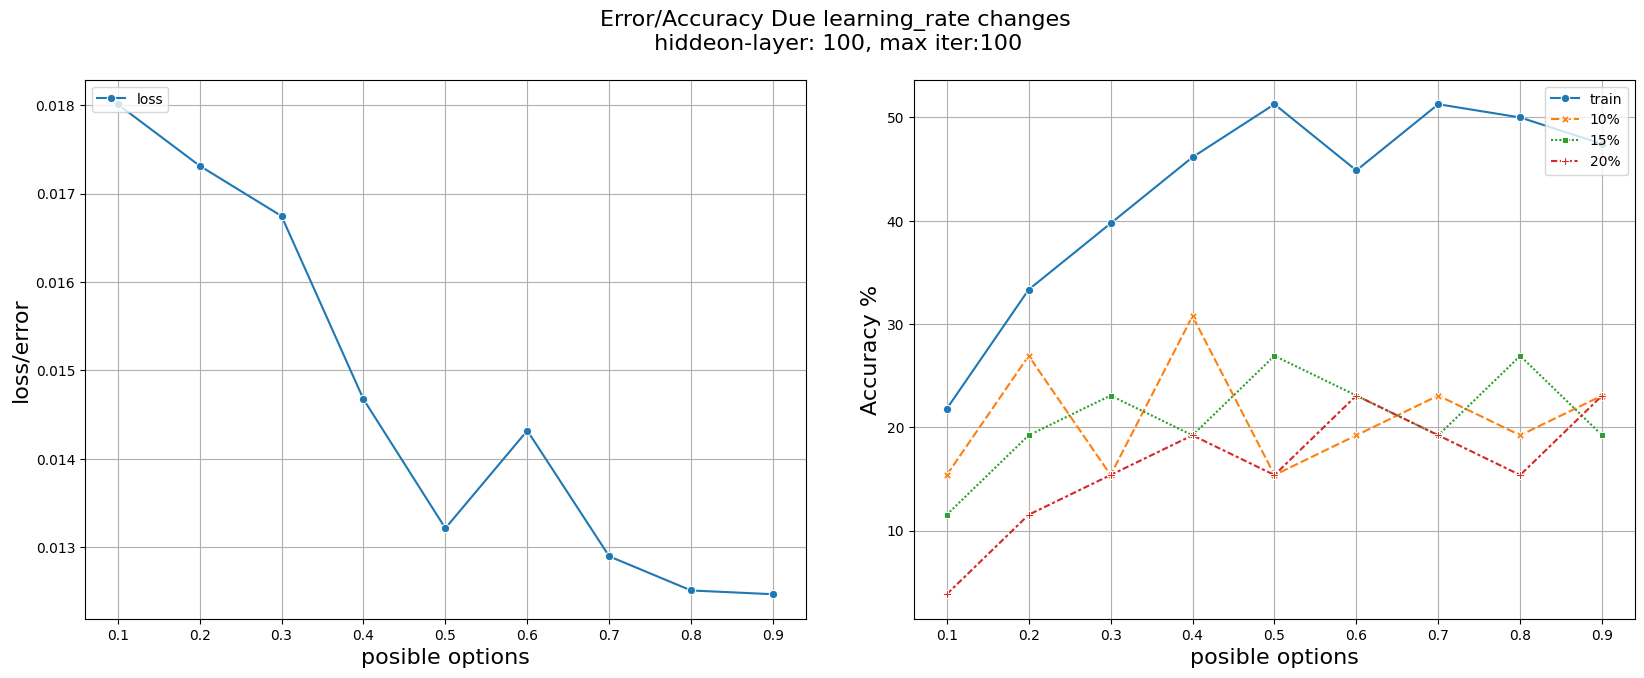

In [42]:


fig, (ax1 , ax2)= plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle(f"Error/Accuracy Due learning_rate changes\n hiddeon-layer: {100}, max iter:{100}", fontsize=16, color = 'k' )
plt.subplots_adjust(left= None, bottom=None, right= None , top=None, wspace=0.15, hspace=0.3)


sns.lineplot(result_2[['loss']]
             , ax=ax1,  markers= True)



sns.lineplot(result_2[["train", "10%" ,  "15%" , "20%" ]] * 100
             , ax=ax2,  markers= True)


ax1.set_xlabel('posible options' , fontsize=16)
ax2.set_xlabel('posible options' , fontsize=16)


ax1.set_ylabel('loss/error' , fontsize=16)
ax2.set_ylabel('Accuracy %' , fontsize=16)


ax1.grid()
ax2.grid()

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.savefig(r"./Error-Accuracy Due learning rate changes.svg", dpi = 'figure')
plt.show()


# Posible Iteration

In [43]:


error_due_iter = list()

accu_on_train = list()
accu_on_10_iter = list()
accu_on_15_iter = list()
accu_on_20_iter = list()


for idx, iters in enumerate(posible_iter, 1):

    model_iter = NlpClassifier(
                        layers= (100,),
                        learning_rate = .1,
                        max_iter = iters,
                        activation_function = active_function)
    
    histroy = model_iter.fit(X_train ,Y_train)
    error_due_iter.append(histroy['loss'])

    predict_on_train = model_iter.predict(X_train )
    score_02 = model_iter.evaluete(predict_on_train , np.argmax(Y_train, axis=1))
    accu_on_train.append(score_02 )

    predict_on_10 = model_iter.predict(X_10 )
    score_12 = model_iter.evaluete(predict_on_10 , Y_10)
    accu_on_10_iter.append(score_12 )
    
    predict_on_15 = model_iter.predict(X_15 )
    score_22 = model_iter.evaluete(predict_on_15 , Y_15)
    accu_on_15_iter.append(score_22 )
    
    predict_on_20 = model_iter.predict(X_20 )
    score_32 = model_iter.evaluete(predict_on_20 , Y_20)
    accu_on_20_iter.append( score_32 )

    print(f"""{pd.DataFrame({
                            "iteration": [iters,],
                            "loss" : [histroy['loss'],],
                            "train" : [score_02,],
                            "10%"  : [score_12 ,],
                            "15%"  : [ score_22,],
                            "20%"  : [ score_32 ,] }, index = [idx])
                            }
""")
print("="*25)
result_3 = pd.DataFrame({
                        "iteration": posible_iter,
                        "train" : accu_on_train ,
                        "loss"  : error_due_iter,
                        "10%"  : accu_on_10_iter,
                        "15%"  : accu_on_15_iter,
                        "20%"  : accu_on_20_iter })

result_3.set_index("iteration", inplace= True)

# with pd.ExcelWriter("total results-nemo.xlsx", mode= "a") as writer:
#     result_3.to_excel(writer, sheet_name='iterations')

result_3




   iteration      loss    train       10%       15%       20%
1        100  0.017835  0.24359  0.038462  0.038462  0.038462

   iteration      loss     train       10%       15%       20%
2        200  0.017292  0.384615  0.076923  0.153846  0.115385

   iteration      loss     train       10%       15%       20%
3        300  0.016476  0.474359  0.115385  0.115385  0.115385

   iteration      loss     train       10%       15%       20%
4        400  0.015193  0.474359  0.230769  0.192308  0.115385

   iteration     loss     train       10%       15%       20%
5        500  0.01486  0.512821  0.192308  0.269231  0.153846

   iteration      loss     train       10%       15%       20%
6        600  0.013271  0.487179  0.269231  0.192308  0.192308

   iteration      loss  train       10%       15%       20%
7        700  0.013093    0.5  0.307692  0.307692  0.192308

   iteration      loss     train       10%       15%       20%
8        800  0.012447  0.474359  0.269231  0.346154  0.26

,train,loss,10%,15%,20%
iteration,,,,,
100,0.243590,0.017835,0.038462,0.038462,0.038462
200,0.384615,0.017292,0.076923,0.153846,0.115385
300,0.474359,0.016476,0.115385,0.115385,0.115385
400,0.474359,0.015193,0.230769,0.192308,0.115385
500,0.512821,0.014860,0.192308,0.269231,0.153846
600,0.487179,0.013271,0.269231,0.192308,0.192308
700,0.500000,0.013093,0.307692,0.307692,0.192308
800,0.474359,0.012447,0.269231,0.346154,0.269231
900,0.512821,0.011029,0.307692,0.153846,0.230769


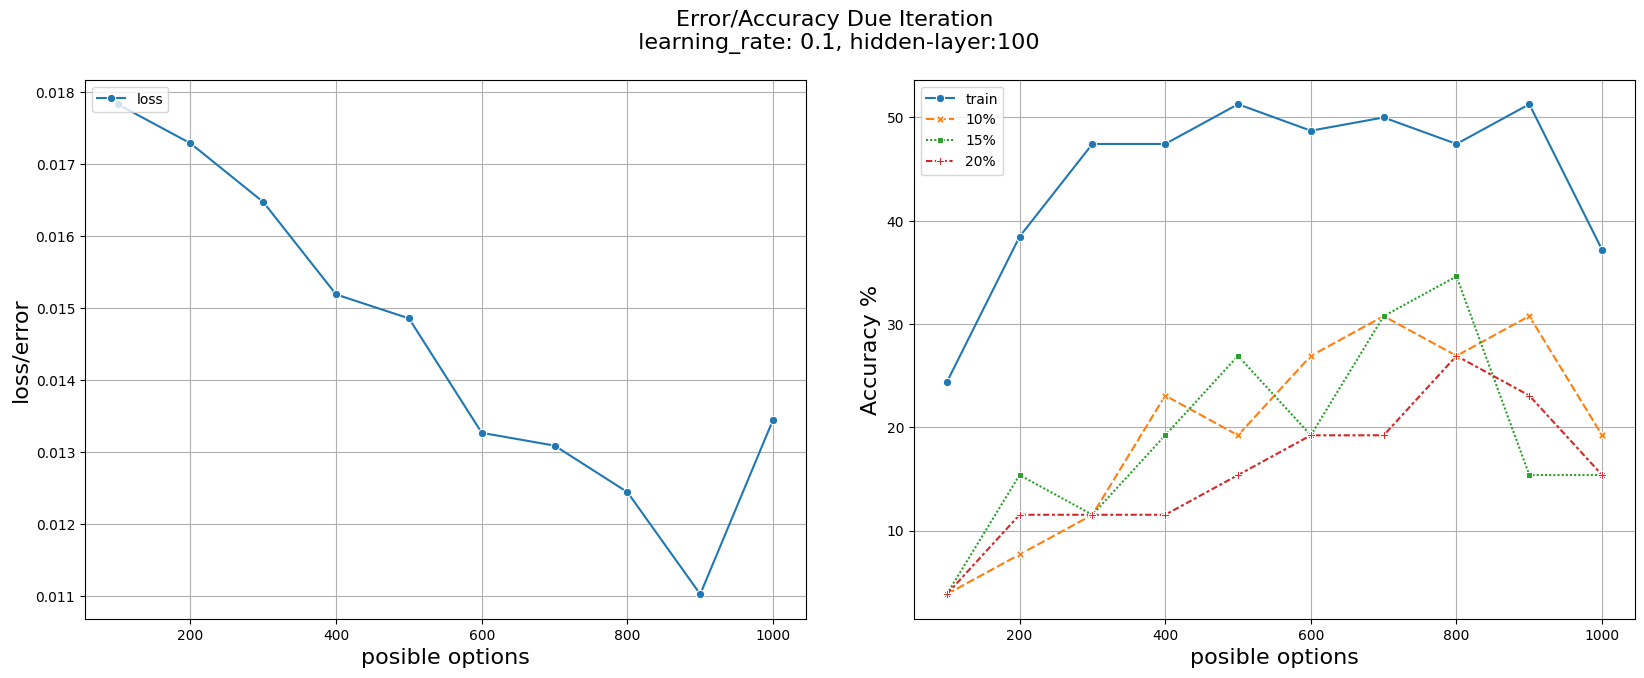

In [44]:

fig, (ax1 , ax2)= plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle(f"Error/Accuracy Due Iteration\n learning_rate: {.1}, hidden-layer:{100}", fontsize=16, color = 'k' )
plt.subplots_adjust(left= None, bottom=None, right= None , top=None, wspace=0.15, hspace=0.3)



sns.lineplot(result_3[['loss']]
             , ax=ax1,  markers= True)



sns.lineplot(result_3[[ "train" ,"10%" ,  "15%" , "20%" ]] * 100
             , ax=ax2,  markers= True)


ax1.set_xlabel('posible options' , fontsize=16)
ax2.set_xlabel('posible options' , fontsize=16)


ax1.set_ylabel('loss/error' , fontsize=16)
ax2.set_ylabel('Accuracy %' , fontsize=16)


ax1.grid()
ax2.grid()

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

fig.savefig(rf"./Error-Accuracy Due iteration changes{active_function}.svg", dpi = 'figure')
plt.show()



In [45]:

max_length = max(len(error_due_layers), len(error_due_iter), len(error_due_lr))

# Pad the lists with NaN values to make them equal length
error_due_layers += [np.nan] * (max_length - len(error_due_layers))
error_due_iter += [np.nan] * (max_length - len(error_due_iter))
error_due_lr += [np.nan] * (max_length - len(error_due_lr))

all_losses = pd.DataFrame({
    "layers change": error_due_layers,
    "iteration change": error_due_iter,
    "learning rate change": error_due_lr
}, dtype=np.float16)


with pd.ExcelWriter(f"total results-nemo-{active_function}.xlsx", mode= "w") as writer:
    all_losses.to_excel(writer, sheet_name="loss")
    result_1.to_excel(writer, sheet_name='layers')
    result_2.to_excel(writer, sheet_name="learning rate")
    result_3.to_excel(writer, sheet_name='iterations')



all_losses


,layers change,iteration change,learning rate change
0,0.017426,0.017838,0.018005
1,0.017776,0.017288,0.017319
2,0.017715,0.016479,0.016739
3,0.017715,0.015190,0.014679
4,0.017792,0.014862,0.013214
5,NaN,0.013268,0.014320
6,NaN,0.013092,0.012901
7,NaN,0.012444,0.012512
8,NaN,0.011032,0.012474
9,NaN,0.013451,NaN


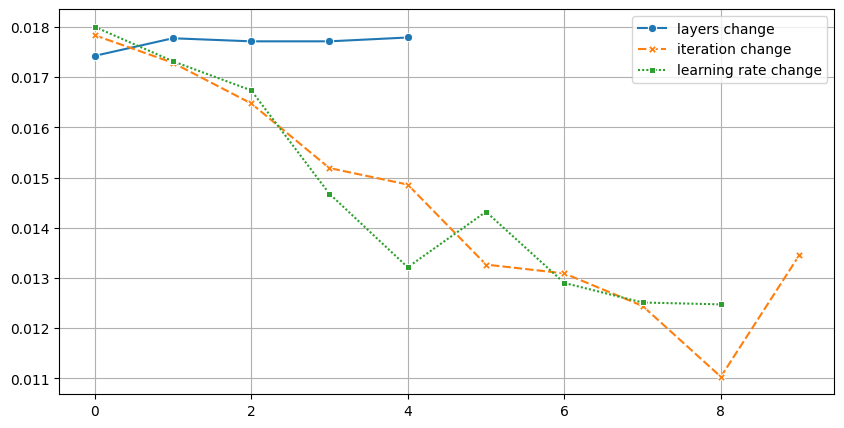

In [46]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(all_losses, markers=True)
plt.grid()
plt.show()